In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

In [2]:
df= pd.read_csv('Amazon - Movies and TV Ratings.csv')

In [3]:
df

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,A1IMQ9WMFYKWH5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4844,A1KLIKPUF5E88I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4845,A5HG6WFZLO10D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4846,A3UU690TWXCG1X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [4]:
df.shape

(4848, 207)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


In [6]:
df.describe().T.mean() # An average of 24.27 i.e.24 movies were rated by a user in this data set

count    24.271845
mean      4.448437
std       0.653453
min       3.742718
25%       4.371359
50%       4.563107
75%       4.638350
max       4.689320
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4848 entries, 0 to 4847
Columns: 207 entries, user_id to Movie206
dtypes: float64(206), object(1)
memory usage: 7.7+ MB


<AxesSubplot:xlabel='count'>

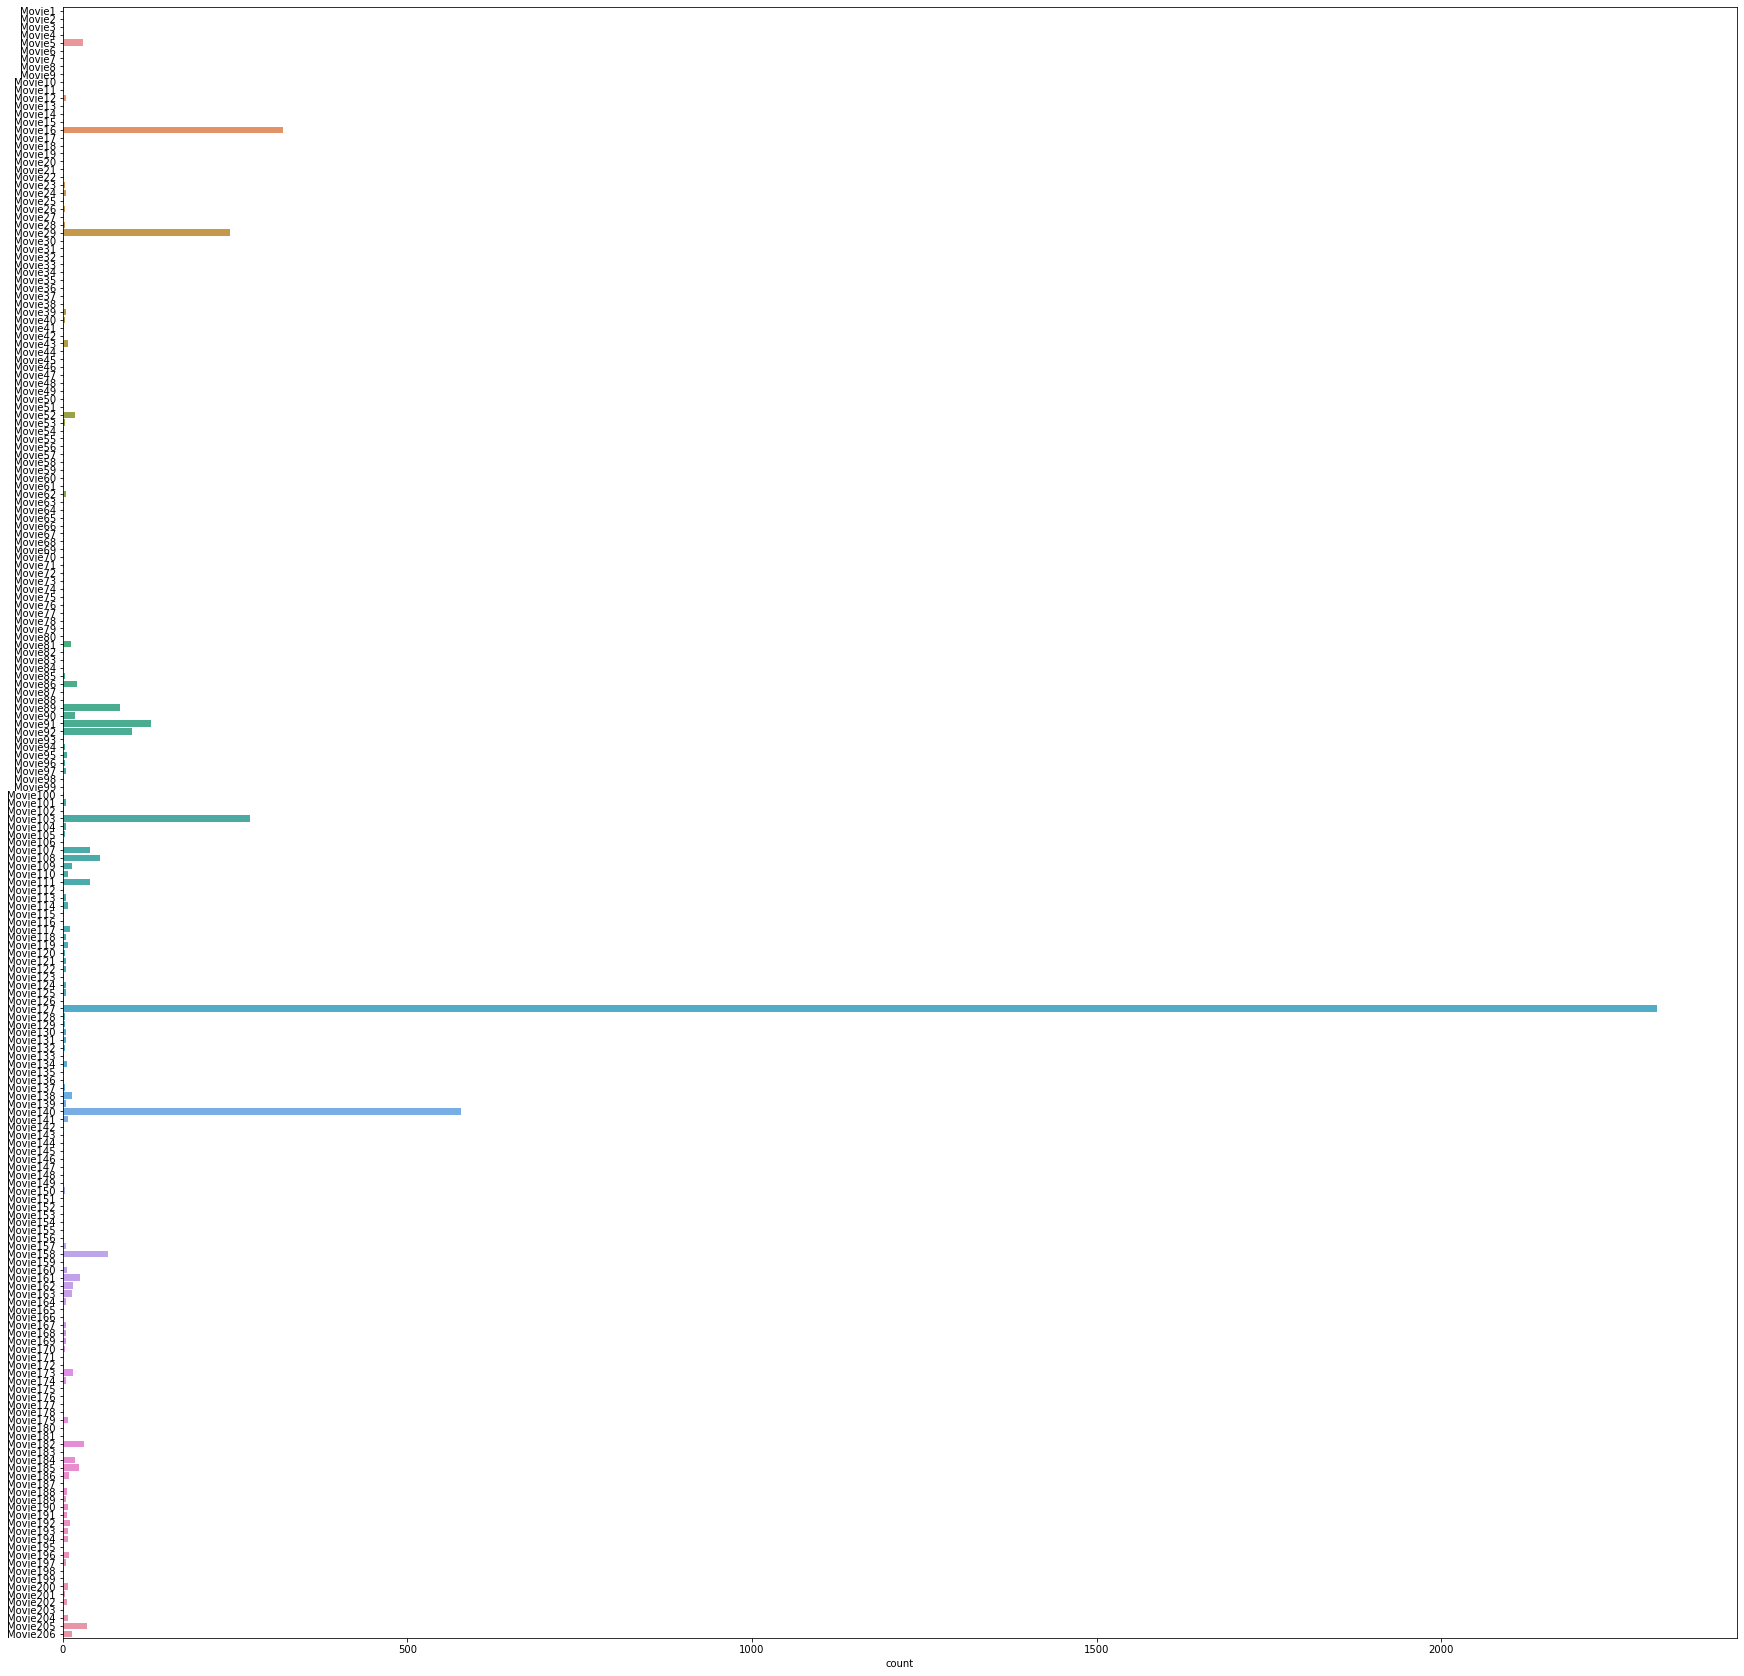

In [8]:
plt.figure(figsize=(30,30))
sns.barplot(y=df.describe().T.index, x=df.describe().T['count'])

In [ ]:
# Task 1: Which movies have maximum views/ratings?
max_values = pd.DataFrame(df.notna().sum()[1:], columns = ['viewers'])

plt.figure(figsize=(25,8))
plt.scatter(max_values.index, max_values.viewers)
# Movie127 was found to have maximum views
max_values.sort_values(by='viewers', ascending=False).head()

In [42]:
df.drop('user_id', axis=1).sum().sort_values(ascending=False)[:5].to_frame()
# # Movie127 was found to have maximum ratings

,0
Movie127,9511.0
Movie140,2794.0
Movie16,1446.0
Movie103,1241.0
Movie29,1168.0


In [11]:
# Task 2: What is the average rating for each movie? Define the top 5 movies with the maximum ratings.
df.describe().T['mean'].sort_values(ascending=False)[:5].to_frame()

,mean
Movie1,5.0
Movie55,5.0
Movie131,5.0
Movie132,5.0
Movie133,5.0


In [12]:
# Task 3: Define the top 5 movies with the least audience.
df.describe().T['count'].sort_values()[:5].to_frame()
# Movies 1,71,145,69,68 have least viewership

,count
Movie1,1.0
Movie71,1.0
Movie145,1.0
Movie69,1.0
Movie68,1.0


In [13]:
df_new = df.melt(id_vars=df.columns[0], value_vars = df.columns[1:], var_name='Movies', value_name='Ratings')

In [14]:
df_new.fillna(0, inplace=True)

In [15]:
df_new.head()

,user_id,Movies,Ratings
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,0.0
2,A3LKP6WPMP9UKX,Movie1,0.0
3,AVIY68KEPQ5ZD,Movie1,0.0
4,A1CV1WROP5KTTW,Movie1,0.0


In [16]:
# Model 1: User based recommendation system

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
n_users = df_new['user_id'].unique().shape[0]
n_movies = df_new['Movies'].unique().shape[0]
trainset, testset = train_test_split(df_new, test_size=0.25)

In [19]:
from sklearn.preprocessing import LabelEncoder
for col in df_new.select_dtypes(['object']).columns:
    le = LabelEncoder()
    trainset[col] = le.fit_transform(trainset[col])
    testset[col]  = le.transform(testset[col])

<ipython-input-19-5bde78bcb58a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainset[col] = le.fit_transform(trainset[col])
<ipython-input-19-5bde78bcb58a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testset[col]  = le.transform(testset[col])


In [20]:
train_data_matrix = np.zeros((n_users, n_movies))
for line in trainset.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3]
    
train_data_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
test_data_matrix = np.zeros((n_users, n_movies))
for line in testset.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

test_data_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
from sklearn.metrics import pairwise_distances
user_similarity = pairwise_distances(train_data_matrix, metric = 'cosine')
movie_similarity = pairwise_distances(train_data_matrix.T, metric = 'cosine')
mean_user_rating = train_data_matrix.mean(axis=1)[:, np.newaxis]
rating_diff = (train_data_matrix - mean_user_rating)
user_pred = mean_user_rating + user_similarity.dot(rating_diff)/np.array([np.abs(user_similarity).sum(axis=1)]).T

In [23]:
user_pred

array([[ 6.56213733e-03,  4.94463129e-03,  1.30321615e-02, ...,
         4.94463129e-03,  6.56213733e-03,  6.56213733e-03],
       [-1.55015313e-02, -1.65330972e-02, -1.13752677e-02, ...,
        -1.65330972e-02, -1.55015313e-02, -1.55015313e-02],
       [ 9.07022961e-03,  8.00120746e-03,  1.33463182e-02, ...,
         8.00120746e-03,  9.07022961e-03,  9.07022961e-03],
       ...,
       [ 1.70776840e-03,  9.02623534e-05,  8.17779259e-03, ...,
         9.02623534e-05,  1.70776840e-03,  1.70776840e-03],
       [-1.55015313e-02, -1.65330972e-02, -1.13752677e-02, ...,
        -1.65330972e-02, -1.55015313e-02, -1.55015313e-02],
       [ 9.55946094e-03,  8.43130800e-03,  1.40720727e-02, ...,
         8.43130800e-03,  9.55946094e-03,  9.55946094e-03]])

In [24]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(train_data_matrix, user_pred))
RMSE

0.29495699552104143

In [25]:
user_similarity = pairwise_distances(test_data_matrix, metric = 'cosine')
movie_similarity = pairwise_distances(test_data_matrix.T, metric = 'cosine')
mean_user_rating = test_data_matrix.mean(axis=1)[:, np.newaxis]
rating_diff = (test_data_matrix - mean_user_rating)
user_pred = mean_user_rating + user_similarity.dot(rating_diff)/np.array([np.abs(user_similarity).sum(axis=1)]).T

In [26]:
user_pred

array([[-0.00542824, -0.00460299, -0.00542824, ..., -0.00439667,
        -0.0048093 , -0.00542824],
       [ 0.00128279,  0.00221328,  0.00128279, ...,  0.00244591,
         0.00198066,  0.00128279],
       [-0.00542824, -0.00460299, -0.00542824, ..., -0.00439667,
        -0.0048093 , -0.00542824],
       ...,
       [-0.00542824, -0.00460299, -0.00542824, ..., -0.00439667,
        -0.0048093 , -0.00542824],
       [ 0.00613716,  0.00706765,  0.00613716, ...,  0.00730027,
         0.00683503,  0.00613716],
       [-0.00542824, -0.00460299, -0.00542824, ..., -0.00439667,
        -0.0048093 , -0.00542824]])

In [27]:
RMSE = np.sqrt(mean_squared_error(test_data_matrix, user_pred))
RMSE

0.16321836465796394

In [28]:
trainset.head()

,user_id,Movies,Ratings
44162,2842,1,0.0
643166,1017,38,0.0
738711,2978,60,0.0
411527,2226,190,0.0
737534,949,60,0.0


In [29]:
# Model 2: Model Based Collaborative Filtering System

In [30]:
from scipy.sparse import csr_matrix
df_movie_features = df_new.pivot(
                       index = 'Movies',
                       columns = 'user_id',
                    values = 'Ratings')

# Covert dataframe of movie fetures to scipy sparse matrix
mat_movie_features = csr_matrix(df_movie_features.values)

In [31]:
df_movie_features.head()

user_id,A0047322388NOTO4N8SKD,A00473363TJ8YSZ3YAGG9,A1004AX2J2HXGL,A100CQXJ6D44T9,A100Z2S0880G9A,A1027BL79BSP5P,A102Z4PIK7CYD8,A10367AR7BPFG2,A103HNKB9YAN6P,A103KNDW8GN92L,...,AZNADO488RR7H,AZPCHLL1GHUXU,AZQLDLVVX9PE,AZR2EXV14JPHN,AZSL7FA9NWYX0,AZT7WWYF4YVJA,AZVER2EPLYDZ9,AZY4RYP9948K9,AZYJ9TS07B02W,AZZ1KF8RAO1BR
Movies,,,,,,,,,,,,,,,,,,,,,
Movie1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Movie102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_movie_features.shape

(206, 4848)

In [33]:
# Decomposing the matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components = 50)
decomposed_matrix = SVD.fit_transform(df_movie_features)
decomposed_matrix.shape

(206, 50)

In [34]:
# Correlation Matrix
Correlation_matrix = np.corrcoef(decomposed_matrix)
Correlation_matrix.shape

(206, 206)

In [35]:
# Random Selection
df_movie_features.index[52]

'Movie146'

In [36]:
i = 'Movie146'
movie_names = list(df_movie_features.index)
movie_id = movie_names.index(i)
movie_id

52

In [37]:
Correlation_ID = Correlation_matrix[movie_id]
Correlation_ID.shape

(206,)

In [38]:
Recommend = list(df_movie_features.index[Correlation_ID>0.6])
Recommend.remove(i) # Removing the movie already seen by the user
Recommend

['Movie102',
 'Movie159',
 'Movie178',
 'Movie40',
 'Movie41',
 'Movie48',
 'Movie72',
 'Movie8',
 'Movie80',
 'Movie90',
 'Movie95',
 'Movie97']

In [39]:
# Above are the recommeded movie items based on the user-item interaction